In [1]:
import cv2
# from cv2 import  *
import numpy as np
import os, glob, shutil, sys, tqdm, time
import matplotlib.pyplot as plt

import pandas as pd
%matplotlib inline

In [2]:
cv2.__version__

'3.4.2'

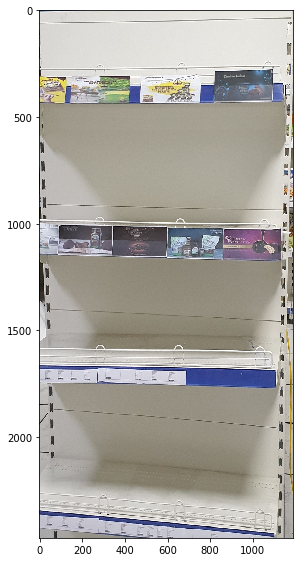

In [3]:
# empty = plt.imread ('C://Users\mkumbhar3//OneDrive - DXC Production//Downloads//Project Docs//Ahold//Design_Images//20200206_165319_new_2.jpg')
# plt.figure (figsize=(10, 10))
# plt.subplot (121)
# plt.imshow (empty)

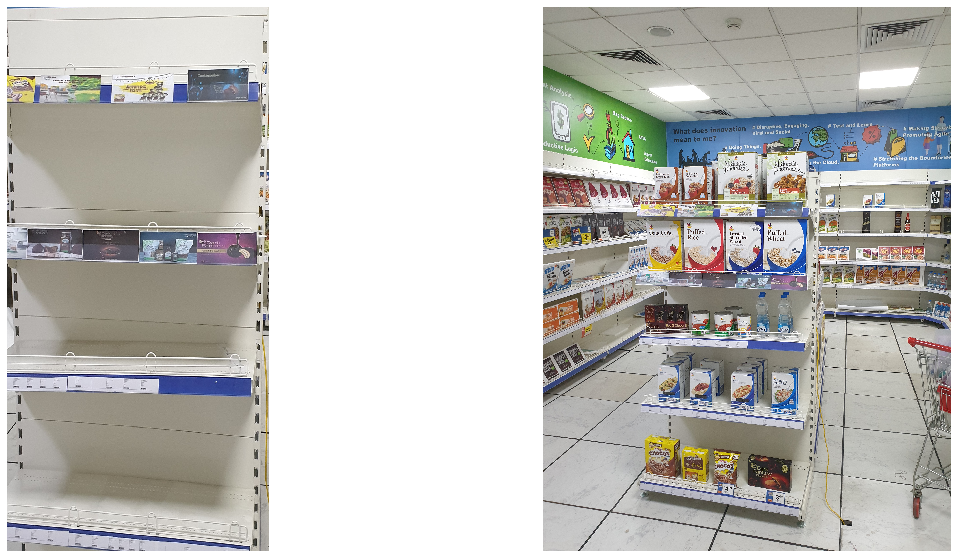

In [30]:
empty = plt.imread ('C://Users\mkumbhar3//OneDrive - DXC Production//Downloads//Project Docs//Ahold//Design_Images//20200206_165319_new_2.jpg')
scene = cv2.imread ('C://Users\mkumbhar3//OneDrive - DXC Production//Downloads//Project Docs//Ahold//Design_Images//20200206_165146.jpg')
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 10))
ax1.imshow(empty[:,:,::]); ax1.axis("off")
ax2.imshow(scene[:,:,::-1]); ax2.axis("off")
plt.show()

In [31]:
# scene = cv2.imread ('C://Users\mkumbhar3//OneDrive - DXC Production//Downloads//Project Docs//Ahold//Design_Images//20200206_165146.jpg')
# # scene = cv2.cvtColor (scene, cv2.COLOR_RGB2GRAY).astype (float)
# plt.imshow (scene)

In [32]:
sift = cv2.xfeatures2d.SIFT_create ()
# cv2.xfeatures2d.SIFT_create()
# gray, src = get_edgeenhanced_image(src)
# sift = cv2.xfeatures2d.SIFT_create(n_kp)

In [33]:
empty_kp, empty_dis = sift.detectAndCompute (empty, None)

In [34]:
scene_kp, scene_dis = sift.detectAndCompute (scene, None)

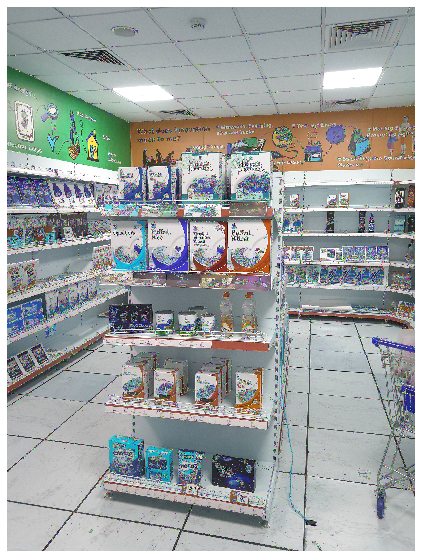

In [35]:
plt.figure (figsize=(10, 10))
plt.axis ('off')
plt.imshow (cv2.drawKeypoints (scene, scene_kp, None))

In [36]:
matcher = cv2.BFMatcher ()

In [37]:
matches = matcher.knnMatch (empty_dis, scene_dis, k=2)

In [38]:
good_matches = []

In [39]:
for m in matches:
    if m [0].distance < 0.5 * m [1].distance:
        good_matches.append (m)

In [40]:
matches = np.asarray (good_matches)

In [41]:
len(matches)

45

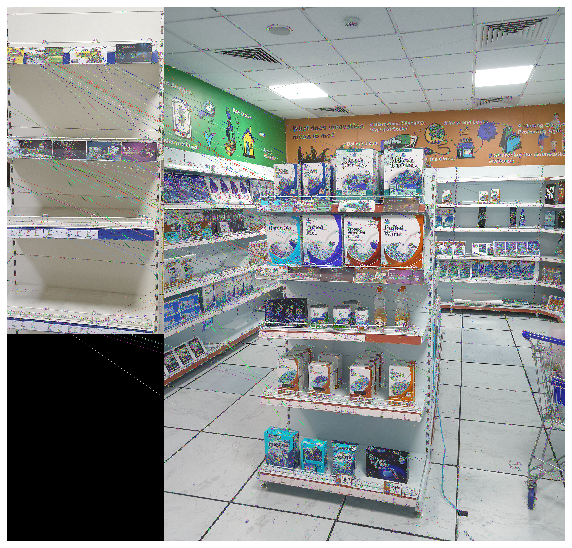

In [42]:
plt.figure (figsize=(10, 10))
plt.axis ('off')
plt.imshow (cv2.drawMatchesKnn (empty, empty_kp, scene, scene_kp, matches, None))

In [43]:
src = np.float32 ([empty_kp [m.queryIdx].pt for m in matches [:,0] ]).reshape (-1,1,2)
dst = np.float32 ([scene_kp [m.trainIdx].pt for m in matches [:,0] ]).reshape (-1,1,2)

In [44]:
H, masked = cv2.findHomography (src, dst, cv2.RANSAC, 1.0, maxIters=5000)

In [45]:
masked.shape # Indicates inliers and outliers

(45, 1)

In [46]:
matches [masked.ravel () == 1].shape

(19, 2)

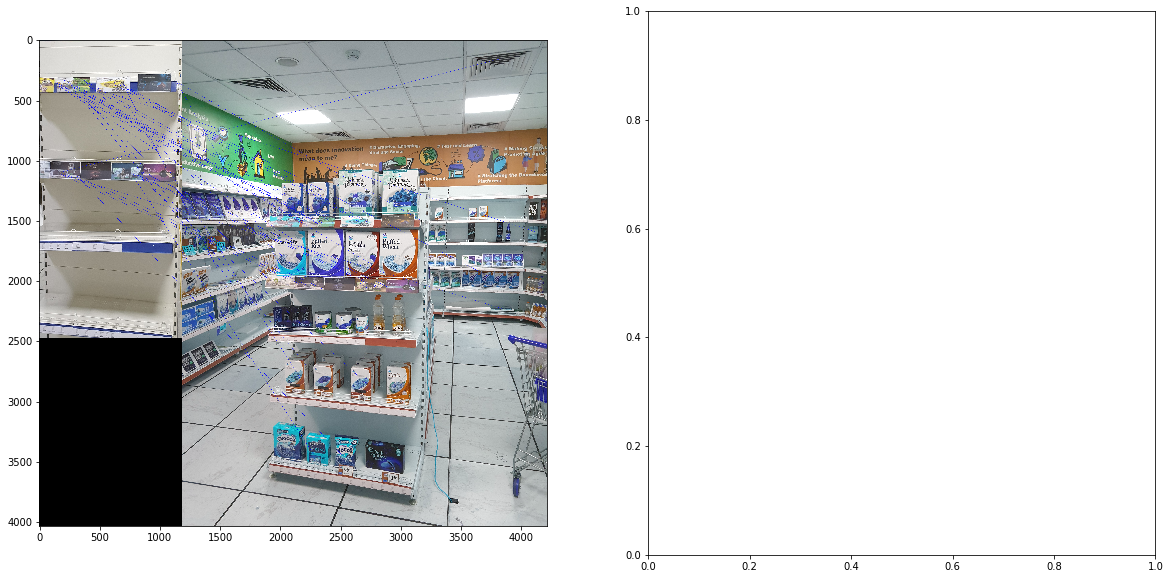

In [58]:
draw_params = dict (
                    matchColor = (0, 0, 255), # draw matches in green color

                    singlePointColor = (255,0,0),
                    #matchesMask = masked.ravel ().tolist (), # draw only inliers
                    flags = 2,
                )
 
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 10))
ax1.imshow (cv2.drawMatchesKnn (empty, empty_kp, scene, scene_kp, matches [masked.ravel () == 1], None, **draw_params))
# ax1.imshow(empty[:,:,::]); ax1.axis("off")
# ax2.imshow(scene[:,:,::-1]); ax2.axis("off")
# plt.show()

# plt.figure (figsize=(10, 10))
# plt.axis ('off')
# plt.imshow (cv2.drawMatchesKnn (empty, empty_kp, scene, scene_kp, matches [masked.ravel () == 1], None, **draw_params))